# Zomato India Case Study EDA

# Part A: Data Analysis and Missing Values

This part answers the following questions for data:
  1. Identify and handle missing values.
  2. Detect and correct any inconsistencies in the dataset (e.g., data types, mislabeled categories).
  3. Feature engineering (if necessary), like extracting useful information from existing data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('zomato_restaurants_in_India.csv')

In [6]:
df.head(1) #getting first row to check the data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.21145,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1


In [7]:
df.tail(1) #similar to above checking last rows further to check the data initially

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [8]:
df.index

RangeIndex(start=0, stop=211944, step=1)

In [9]:
df.shape

(211944, 26)

In [10]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [11]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [12]:
df.info()
#getting the information for each feature (columns). The non null count also shows if there are null values in the column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

Any column above having number of non-null less than 211944 contains null values.
In the next step we will check the unique values in all columns to identify if there are different types of unique values or not.

In [14]:
dfcopy = df # creating copy for data in case original data is required afterwards.
#df contains data that will be transformed to cater inconsistencies

In [15]:
#checking missing values # by this we are getting the count of all the missing values
df.isna().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [16]:
for column in df:
    percentage = (df[column].isnull().sum()/211944*100).round(2)
    print(f" The {column} has {percentage} percent null values")

 The res_id has 0.0 percent null values
 The name has 0.0 percent null values
 The establishment has 0.0 percent null values
 The url has 0.0 percent null values
 The address has 0.06 percent null values
 The city has 0.0 percent null values
 The city_id has 0.0 percent null values
 The locality has 0.0 percent null values
 The latitude has 0.0 percent null values
 The longitude has 0.0 percent null values
 The zipcode has 77.0 percent null values
 The country_id has 0.0 percent null values
 The locality_verbose has 0.0 percent null values
 The cuisines has 0.66 percent null values
 The timings has 1.83 percent null values
 The average_cost_for_two has 0.0 percent null values
 The price_range has 0.0 percent null values
 The currency has 0.0 percent null values
 The highlights has 0.0 percent null values
 The aggregate_rating has 0.0 percent null values
 The rating_text has 0.0 percent null values
 The votes has 0.0 percent null values
 The photo_count has 0.0 percent null values
 The 

Considering the results obtained from percentage of missing value, zip code contains 77 percent null values. These are significantly high and will not affect the results afterwards for our predictive model. Therefore, it would be better to drop the column for zip code. However, we can further align with the stakeholders to understand what is use of zip code and how it can be required for any information that representatives of Zomato would like to extract.
Being data analyst and considering the data that we have, I am dropping the column to make a better model.
Only for the value of Cuisines, we drop restiatnts where there are no values.

In [17]:
df = df.dropna(subset=['cuisines']) #dropping null values for cuisines to clean the data

In [18]:
df = df.drop(columns = ['zipcode']) #dropping the zip code

In [19]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

The column zipcode is dropped from the data.

In [20]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

Considering the features above, right now it seems data types for the features are correct based on kind of data available to us.

In [21]:
df.duplicated().sum()

150606

In [22]:
pct_duplicates = (df.duplicated().sum()/df.shape[0]*100).round(2)
print(f"The percentage of the duplicate rows in the data set is {pct_duplicates}")

The percentage of the duplicate rows in the data set is 71.53


There are a lot of rows which are duplicates. To keep the data consist we would need to drop the duplicate values.

In [23]:
dfnew = df.drop_duplicates(keep='first', ignore_index=True)
#deleting all the duplicates to get the clean data which can help in getting meaningful analysis

In [24]:
dfnew.duplicated().sum()

0

The new dataset is being generated named as dfnew which do not have any duplicate values

It is evident that there are many values in res_id which are repeating. This also does not look consistent with data as it is unique for every restuarant. Therefore, data has further duplicate values which needs to be checked.

In [59]:
df['res_id'].duplicated() #to confirm the duplication

0         False
1         False
2         False
3         False
4         False
          ...  
211939     True
211940    False
211941     True
211942    False
211943     True
Name: res_id, Length: 210553, dtype: bool

In [25]:
df2= dfnew.drop_duplicates(subset=['res_id'], keep='first', ignore_index=True)

In [26]:
df2.shape

(55098, 25)

df2 contains dataframe which is clear of all duplicates to ensure meaningful insights are generated.

Here are many features like URL and other which look like insignificant rightnow for initial analysis required. We will use them as required as the updated dataframe is saved in df2. I am creating a new variable having dataframe only inlcuding columns or features which are significant for analysis. Here discussion with stakeholders is key. However, I am making an assumption based on various industry practices and looking at the data.

In [27]:
df2.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [28]:
dfnew1 = df2[['res_id','name', 'establishment', 'city', 'city_id', 'locality', 'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating', 'rating_text', 'votes', 'photo_count', 'delivery']]

In [29]:
dfnew1.head(2)

,res_id,name,establishment,city,city_id,locality,locality_verbose,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery
0,3400299,Bikanervala,['Quick Bites'],Agra,34,Khandari,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],Agra,34,Agra Cantt,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1


In [30]:
for column in dfnew1:
    print('column',' ',column,' has unique values ', dfnew1[column].nunique())
    print(dfnew1[column].unique())
    print('------------------------------------')

column   res_id  has unique values  55098
[ 3400299  3400005  3401013 ... 18019952  3200996  3201138]
------------------------------------
column   name  has unique values  40757
['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']
------------------------------------
column   establishment  has unique values  27
["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]
------------------------------------
column   city  has unique values  99
['Agra' 'Ahmedabad' 'Gandhinagar' 'Ajmer' 'Alappuzha' 'Allahabad'
 'Amravati' 'Amritsar' 'Aurangabad' 'Bangalore' 'Bhopal' 'Bhubaneshwar'
 '

In [31]:
dfnew1.shape

(55098, 17)

# EDA Statistical Analysis

This parapraph provide analysis for following questions:
1. Descriptive Statistics: Summarize the central tendency, dispersion, and shape of the dataset's distribution.
2. Distribution Analysis: Analyze the distribution of key variables (e.g., ratings,price range, cuisines).
3. Correlation Analysis: Examine the relationships between different variables.

In [32]:
dfnew1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55098 entries, 0 to 55097
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                55098 non-null  int64  
 1   name                  55098 non-null  object 
 2   establishment         55098 non-null  object 
 3   city                  55098 non-null  object 
 4   city_id               55098 non-null  int64  
 5   locality              55098 non-null  object 
 6   locality_verbose      55098 non-null  object 
 7   cuisines              55098 non-null  object 
 8   timings               54230 non-null  object 
 9   average_cost_for_two  55098 non-null  int64  
 10  price_range           55098 non-null  int64  
 11  highlights            55098 non-null  object 
 12  aggregate_rating      55098 non-null  float64
 13  rating_text           55098 non-null  object 
 14  votes                 55098 non-null  int64  
 15  photo_count        

In [33]:
dfnew1.describe() #this is the way to get statistical analysis of all the values

,res_id,city_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery
count,5.509800e+04,55098.000000,55098.000000,55098.000000,55098.000000,55098.000000,55098.000000,55098.000000
mean,1.309156e+07,3354.276997,531.792697,1.719591,2.979478,225.210008,162.336782,-0.345003
std,8.122561e+06,5150.396004,595.916590,0.879407,1.449025,620.517701,589.287353,0.935579
min,5.000000e+01,1.000000,0.000000,1.000000,0.000000,-18.000000,0.000000,-1.000000
25%,3.000944e+06,8.000000,200.000000,1.000000,2.900000,6.000000,1.000000,-1.000000
50%,1.869208e+07,26.000000,350.000000,1.000000,3.500000,36.000000,10.000000,-1.000000
75%,1.887349e+07,11294.000000,600.000000,2.000000,3.900000,177.000000,70.000000,1.000000
max,1.915979e+07,11354.000000,30000.000000,4.000000,4.900000,42539.000000,17702.000000,1.000000


In [34]:
dfnew1[['price_range', 'aggregate_rating']].describe()

,price_range,aggregate_rating
count,55098.000000,55098.000000
mean,1.719591,2.979478
std,0.879407,1.449025
min,1.000000,0.000000
25%,1.000000,2.900000
50%,1.000000,3.500000
75%,2.000000,3.900000
max,4.000000,4.900000


In [35]:
dfnew1.describe(include=['object']) #getting description for all the categorical or descriptive columns

,name,establishment,city,locality,locality_verbose,cuisines,timings,highlights,rating_text
count,55098,55098,55098,55098,55098,55098,54230,55098,55098
unique,40757,27,99,3727,3905,9382,7699,31167,33
top,Domino's Pizza,['Quick Bites'],Bangalore,Civil Lines,"Gomti Nagar, Lucknow",North Indian,11 AM to 11 PM,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Average
freq,399,14000,2247,751,274,4295,6986,860,16256


This is also presents us with some analysis because we can observe
1. The most frequent establishment (type of restuarants) is 'Quick Bytes' on Zomato according to data. There are total 27 different types of establishments.
2. According to this data, we can predict that city having most restuarants is Chennai. Although this might be because of data collection. Therefore, it can be discussed with stakeholders for deriving any analysis further. The data is further for 99 more cities as per analysis above.
3. The most exisitng cusine as per data is North Indian.


This derivation is from the current observation, however there will be further analysis on data to derive more such key insights which can be benficial for the analysis of Zomato.

In [36]:
dfnew1.columns

Index(['res_id', 'name', 'establishment', 'city', 'city_id', 'locality',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'delivery'],
      dtype='object')

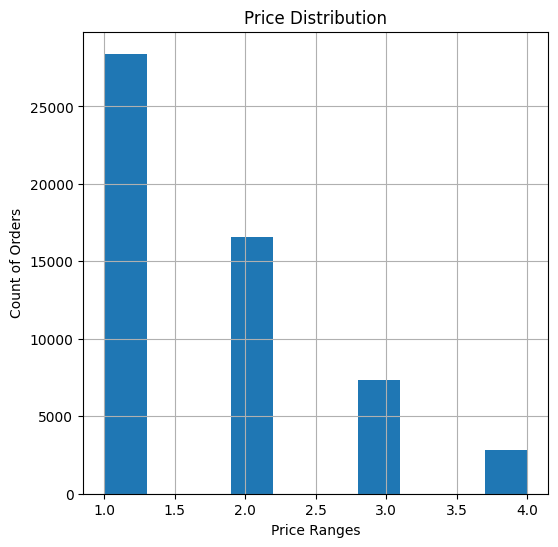

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))
dfnew1[['price_range']].hist(ax=ax)
ax.set_xlabel('Price Ranges')
ax.set_ylabel('Count of Orders')
ax.set_title('Price Distribution')
plt.show()

In [37]:
dfnew1['price_range'].value_counts()

price_range
1    28401
2    16541
3     7361
4     2795
Name: count, dtype: int64

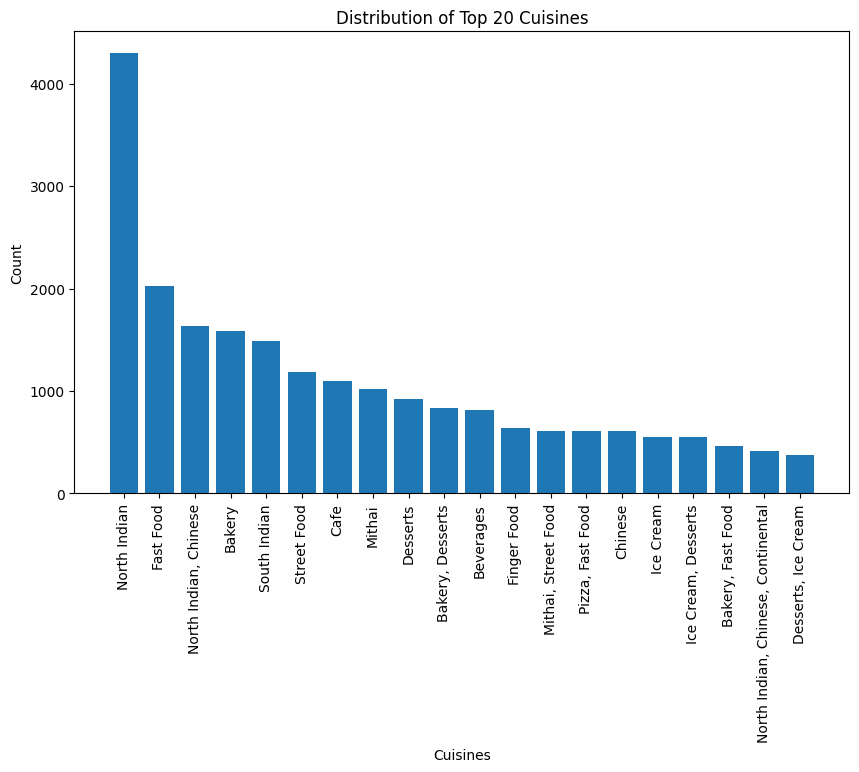

In [77]:
cuisines = dfnew1['cuisines'].value_counts()[:20]
plt.figure(figsize=(10, 6))
plot = plt.bar(cuisines.index,cuisines.values)#defining four bins to get the idea of rating
plt.title('Distribution of Top 20 Cuisines')
plt.xticks(rotation=90)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()

In [38]:
cuisines = dfnew1['cuisines'].value_counts()[:20]
cuisines

cuisines
North Indian                          4295
Fast Food                             2025
North Indian, Chinese                 1636
Bakery                                1585
South Indian                          1489
Street Food                           1187
Cafe                                  1098
Mithai                                1020
Desserts                               922
Bakery, Desserts                       836
Beverages                              817
Finger Food                            642
Mithai, Street Food                    612
Pizza, Fast Food                       608
Chinese                                607
Ice Cream                              552
Ice Cream, Desserts                    551
Bakery, Fast Food                      468
North Indian, Chinese, Continental     414
Desserts, Ice Cream                    373
Name: count, dtype: int64

The most listed cuisine on Zomato is North Indian by considerable margin based on data provided to us. The difference from the top second one is 2270 units in count.

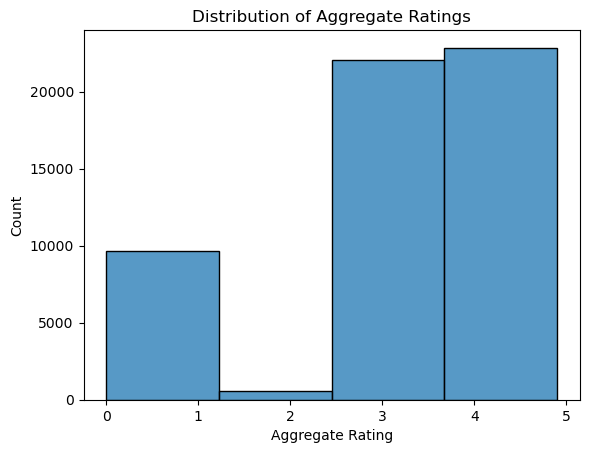

In [39]:
ratings = dfnew1['aggregate_rating']
plot = sns.histplot(ratings, bins=4) # Using histplot for histogram
plot.set_xlabel("Aggregate Rating")  # Set x-axis label
plot.set_ylabel("Count")  # Set y-axis label
plot.set_title("Distribution of Aggregate Ratings")  # Set title
plt.show()

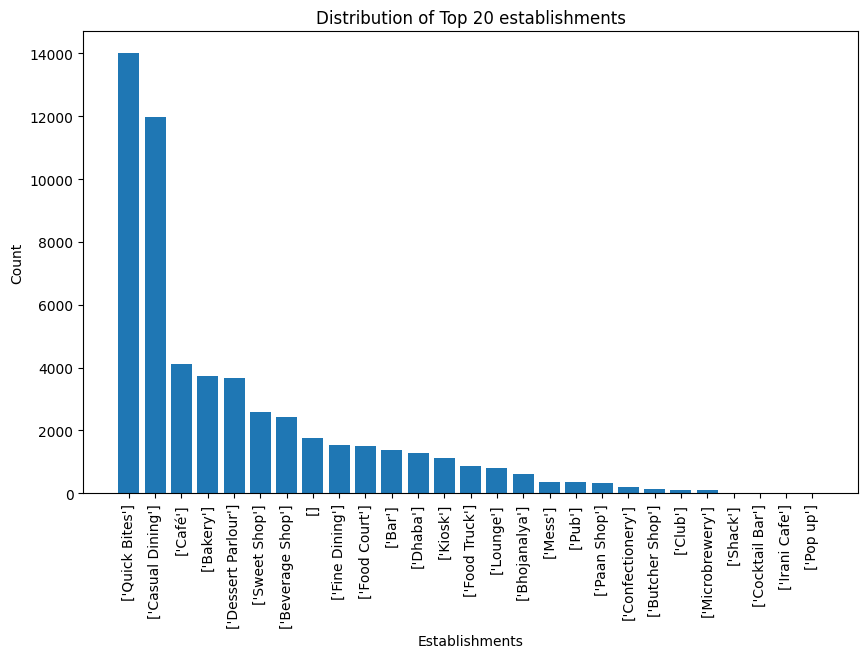

In [83]:
estb = dfnew1['establishment'].value_counts()
plt.figure(figsize=(10, 6))
plot = plt.bar(estb.index,estb.values)#defining four bins to get the idea of rating
plt.title('Distribution of Top 20 establishments')
plt.xticks(rotation=90)
plt.xlabel('Establishments')
plt.ylabel('Count')
plt.show()

In [40]:
estb = dfnew1['establishment'].value_counts()
estb

establishment
['Quick Bites']        14000
['Casual Dining']      11973
['Café']                4114
['Bakery']              3733
['Dessert Parlour']     3668
['Sweet Shop']          2604
['Beverage Shop']       2436
[]                      1766
['Fine Dining']         1534
['Food Court']          1491
['Bar']                 1384
['Dhaba']               1278
['Kiosk']               1126
['Food Truck']           865
['Lounge']               816
['Bhojanalya']           628
['Mess']                 361
['Pub']                  356
['Paan Shop']            320
['Confectionery']        217
['Butcher Shop']         154
['Club']                 112
['Microbrewery']         110
['Shack']                 18
['Cocktail Bar']          16
['Irani Cafe']            14
['Pop up']                 4
Name: count, dtype: int64

With this data we have from Zomato, there are 14000 restuarants which are Quick Bytes and there are 11973 which are casual dining places. This is considerably high number based on all data we have. One can make analysis that high number of places that gets registered on Zomato or higher number of restuarants on Zomato as either Quick Bytes or Cansual Dining. However there are others as well but this is considerably high number across India. Further analysis will help in defining how to target the relevant markets but this can also be a good indicator to begin with.

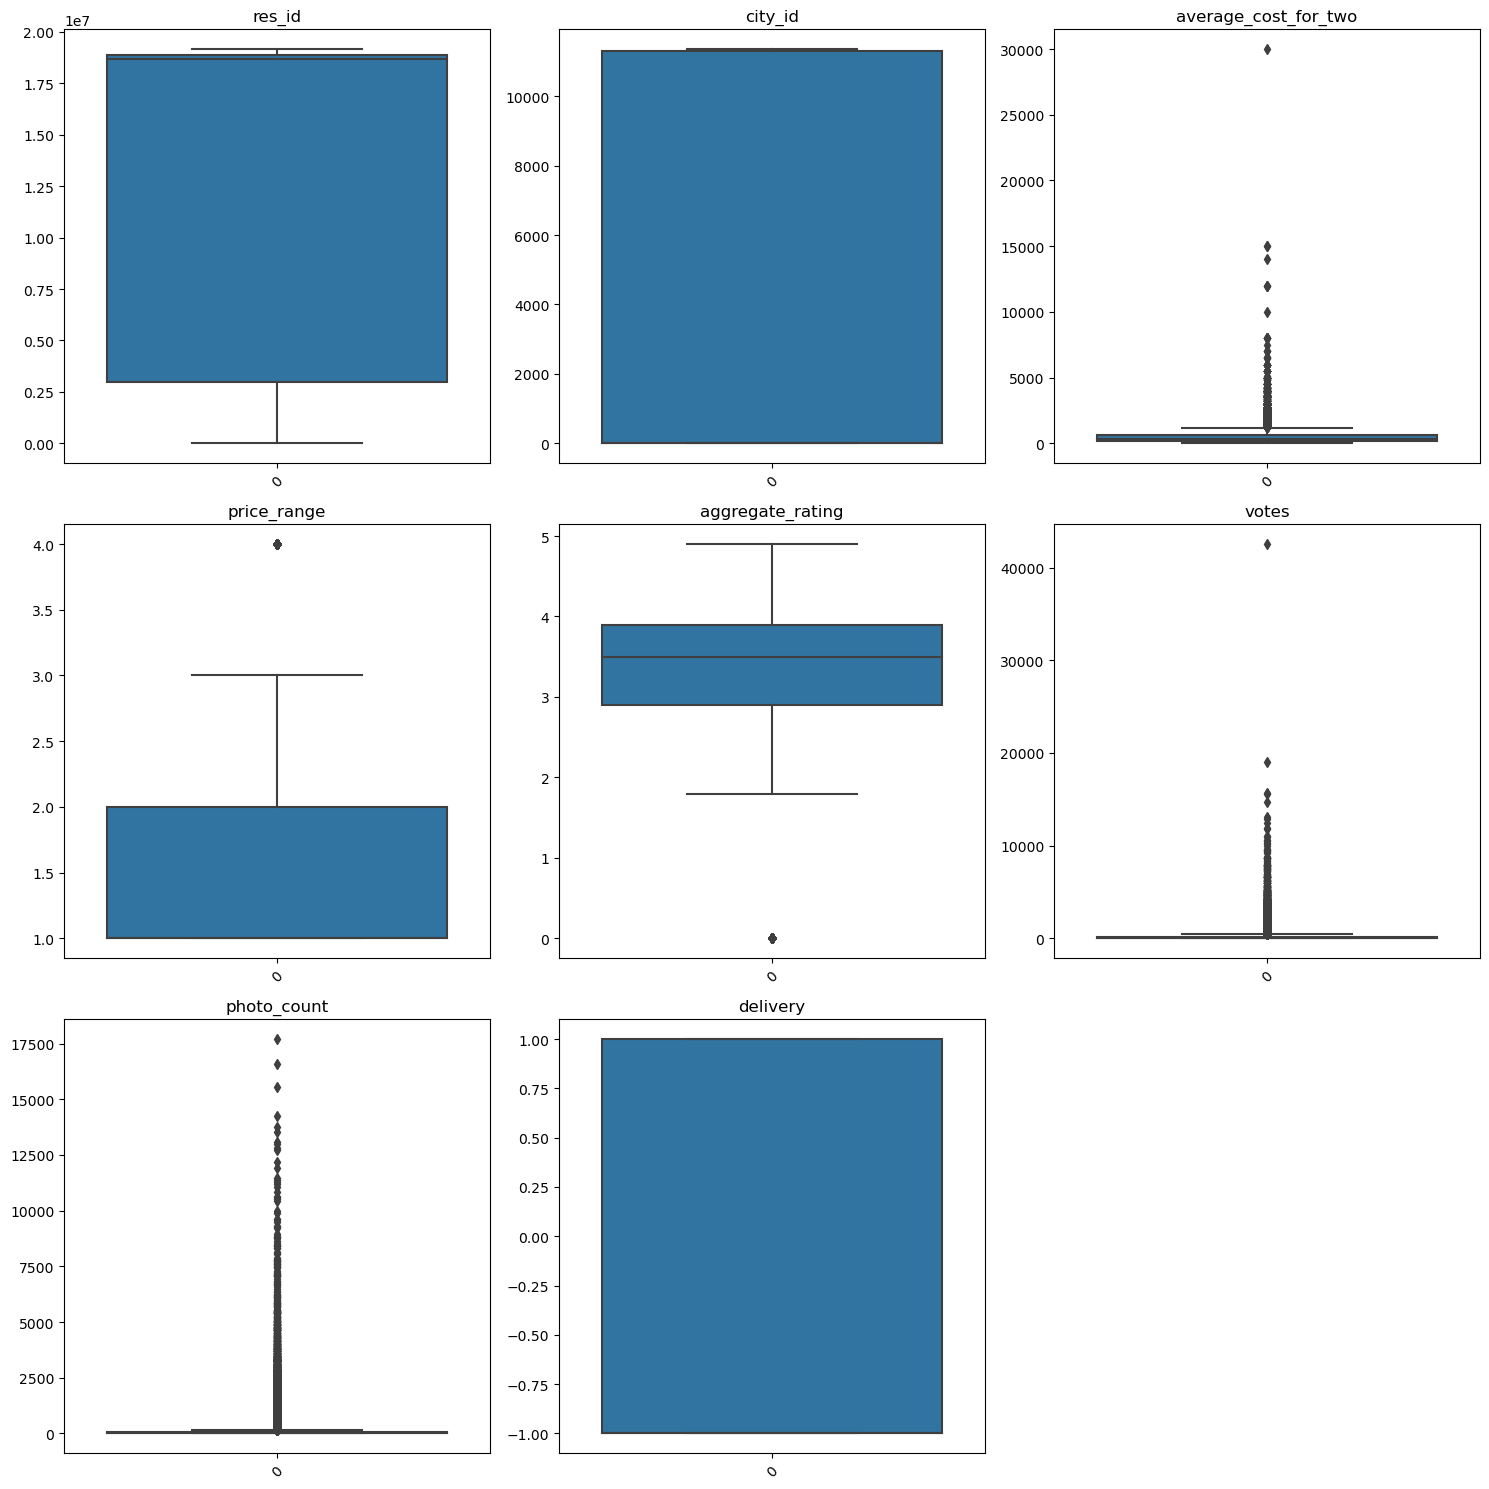

In [42]:
dfplot = dfnew1.select_dtypes(include='number')

# Calculate the number of rows needed
num_rows = (len(dfplot.columns) - 1) // 3 + 1

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each numerical column
for i, column in enumerate(dfplot.columns):
    sns.boxplot(dfplot[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots if necessary
for j in range(len(dfplot.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

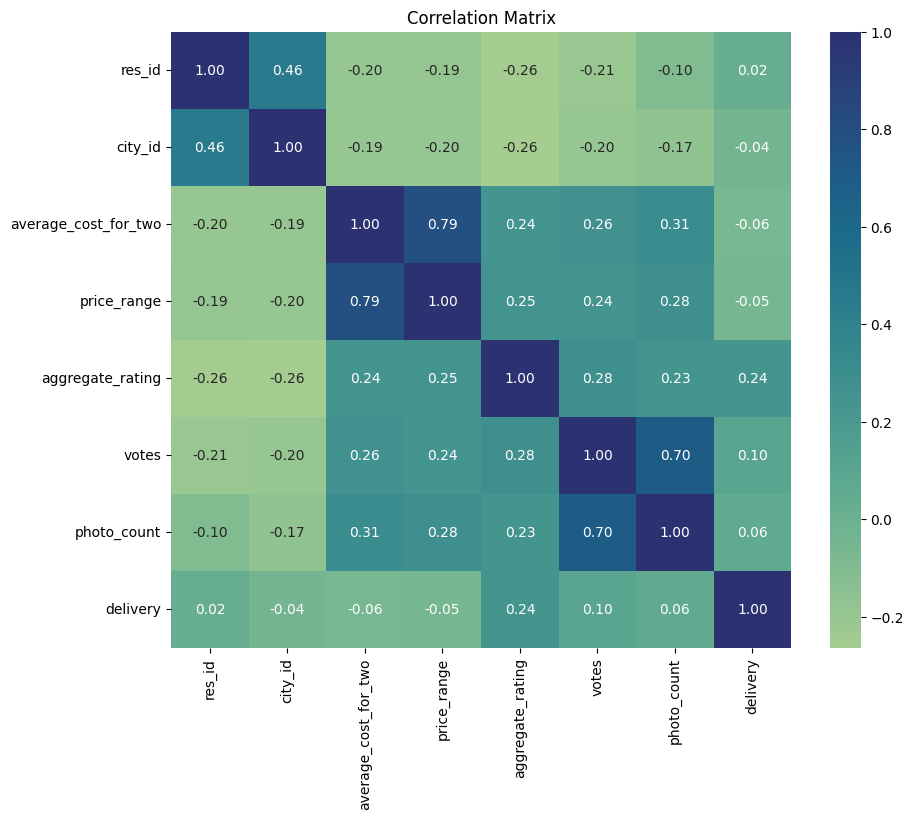

In [87]:
correlation = dfnew1.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="crest", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

It is evident that for there is positive correlation between photo count and votes. It can be infered that all popular restuarants have their photos available. Moreover, price range is also related to costs for two. The higher the costs for two is resturants will fall in the place of high range for price

# Regional Analysis

Customer preferances across cities can be defined by aggregate rating across cities. We can see which cuisine across cities has highest ratings.

In [88]:
regions = dfnew1.groupby(['city', 'cuisines'])['aggregate_rating'].mean().reset_index()
regionsorted = regions.sort_values(by=['city', 'aggregate_rating'], ascending=[True, False])
topcuisinesincity = regionsorted.groupby('city').head(1)
topcuisinesincity

,city,cuisines,aggregate_rating
168,Agra,"North Indian, Continental, Italian",4.9
303,Ahmedabad,"Chinese, Japanese",4.9
586,Ajmer,"Continental, Beverages, South Indian, Fast Foo...",4.8
713,Alappuzha,"Arabian, Continental",4.0
919,Allahabad,"North Indian, Mediterranean",4.7
...,...,...,...
20479,Varanasi,"North Indian, Chinese, BBQ",4.9
20647,Vellore,"Juices, Italian, Burger",3.8
20853,Vijayawada,"North Indian, Andhra",4.9
21058,Vizag,"European, Mediterranean, North Indian",4.9


<ipython-input-89-e7368ee8126e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aggregate_rating', y='city', data=city_stats_sorted, orient='h', palette='viridis')


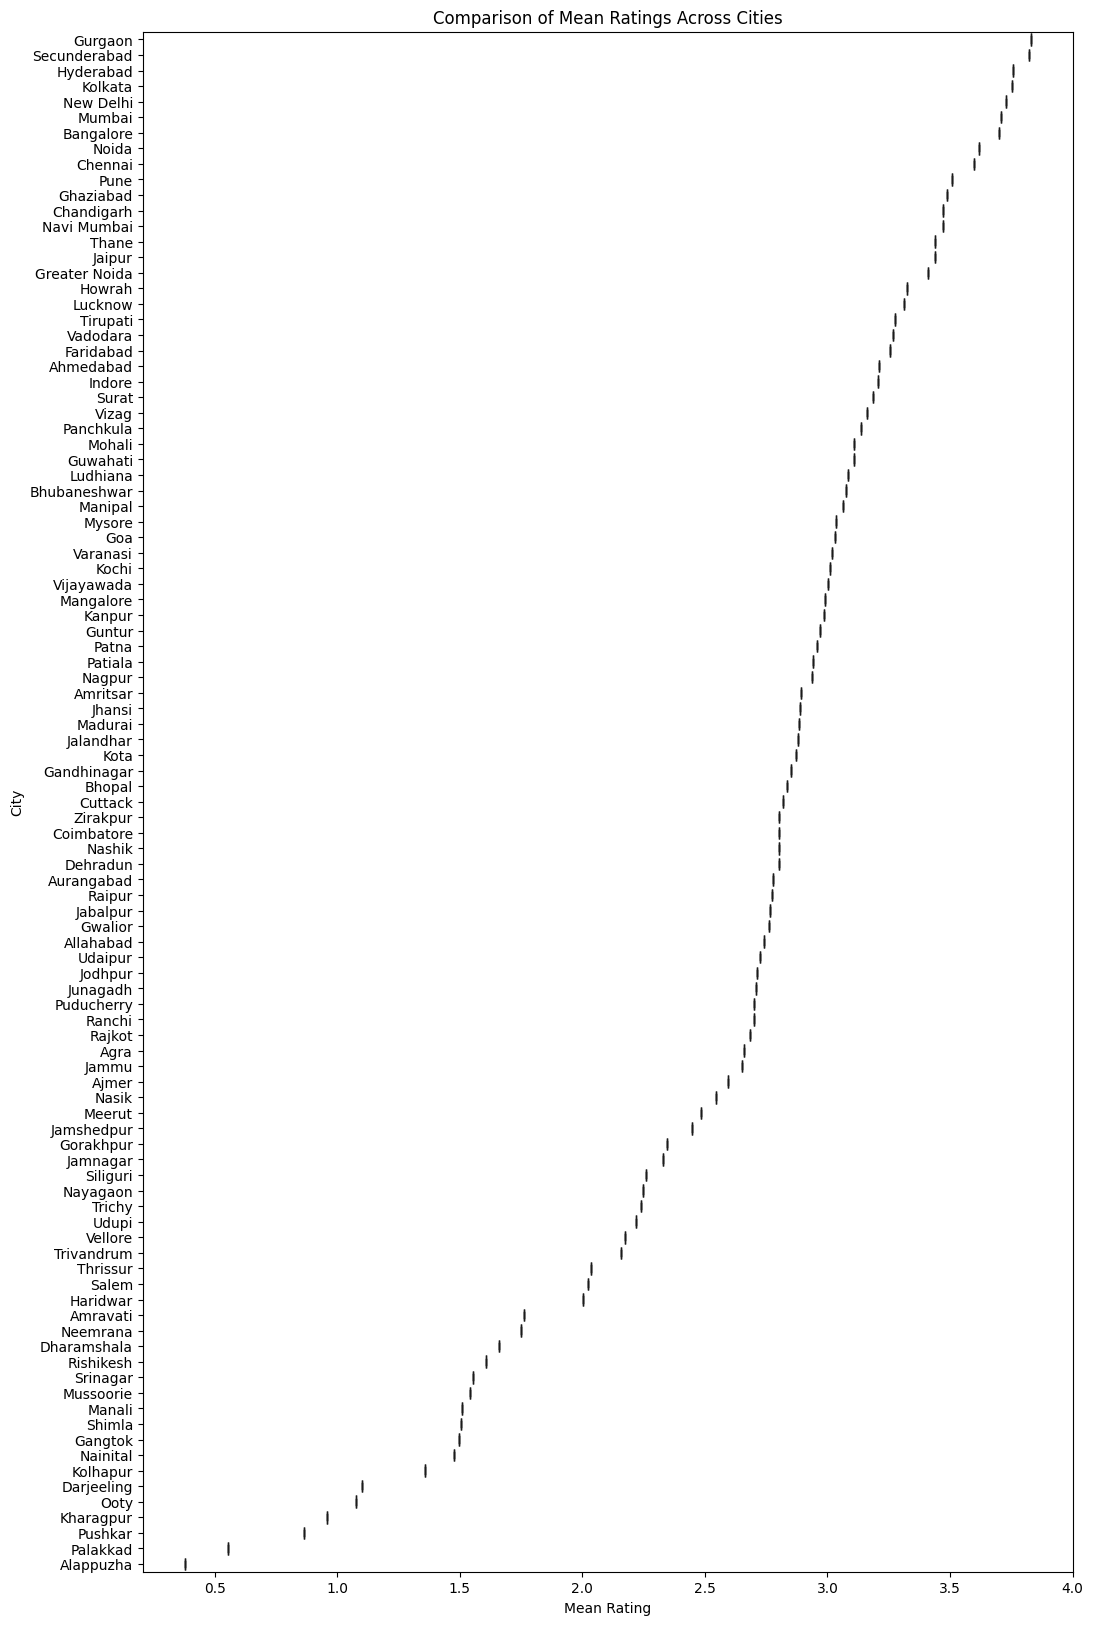

In [89]:
# Group the data by city and calculate mean rating
city_stats = dfnew1.groupby('city')['aggregate_rating'].mean().reset_index()

# Sort the cities based on mean rating
city_stats_sorted = city_stats.sort_values(by='aggregate_rating', ascending=False)

# Set up the figure and axes
plt.figure(figsize=(12, 20))

# Create box plot
sns.boxplot(x='aggregate_rating', y='city', data=city_stats_sorted, orient='h', palette='viridis')

# Add labels and title
plt.xlabel('Mean Rating')
plt.ylabel('City')
plt.title('Comparison of Mean Ratings Across Cities')

# Show the plot
plt.show()

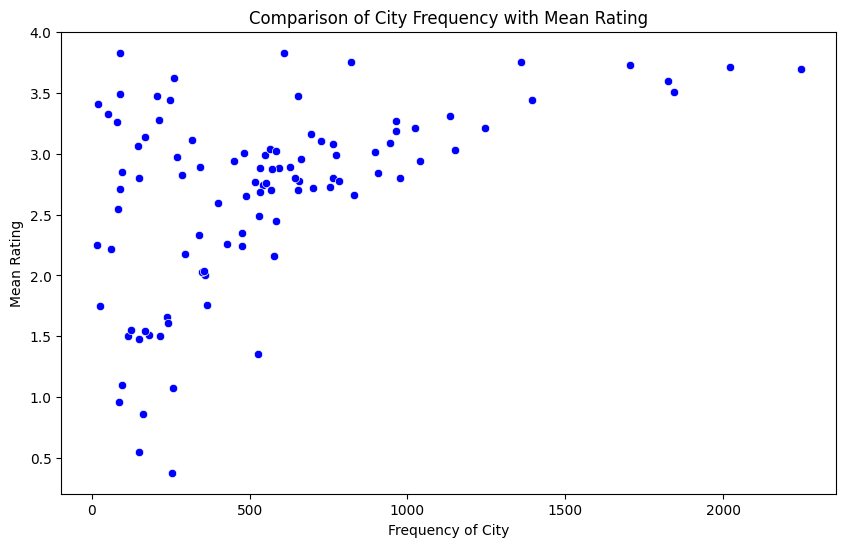

In [90]:
city_stats = dfnew1.groupby('city').agg(mean_rating=('aggregate_rating', 'mean'), frequency=('city', 'size')).reset_index()

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x='frequency', y='mean_rating', data=city_stats, color='blue')

# Add labels and title
plt.xlabel('Frequency of City')
plt.ylabel('Mean Rating')
plt.title('Comparison of City Frequency with Mean Rating')

# Show the plot
plt.show()

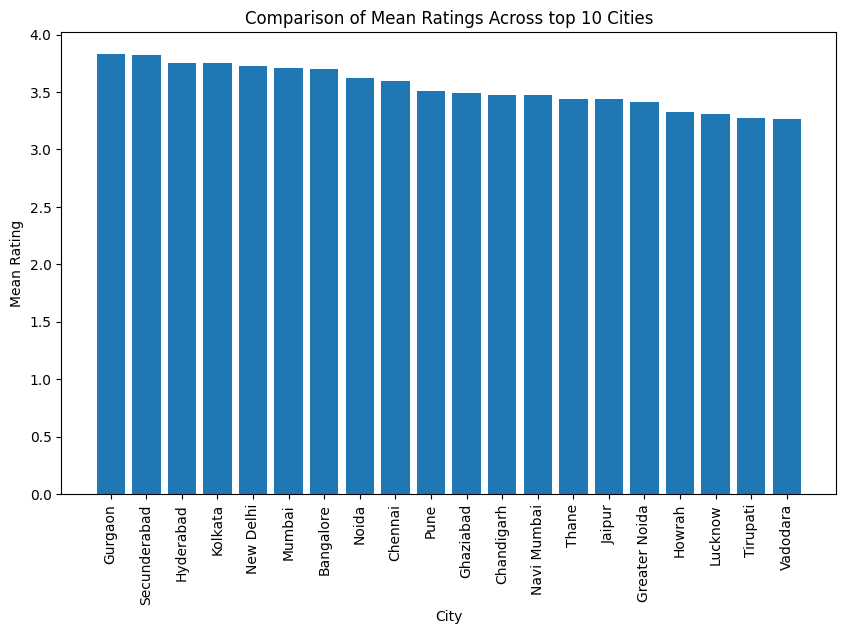

In [91]:
# Group the data by city and calculate mean rating
city_num = dfnew1.groupby('city')['aggregate_rating'].mean().reset_index()
city_num1 = city_num.sort_values(by='aggregate_rating', ascending=False)

# Select the top 20 rows
top20city = city_num1.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top20city['city'], top20city['aggregate_rating'])
# Add labels and title
plt.xlabel('City')
plt.ylabel('Mean Rating')
plt.title('Comparison of Mean Ratings Across top 10 Cities')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Gurgaon has highest overall mean rating as a place taking ratings for all types of restaurants. It is followed by Secunderabad.

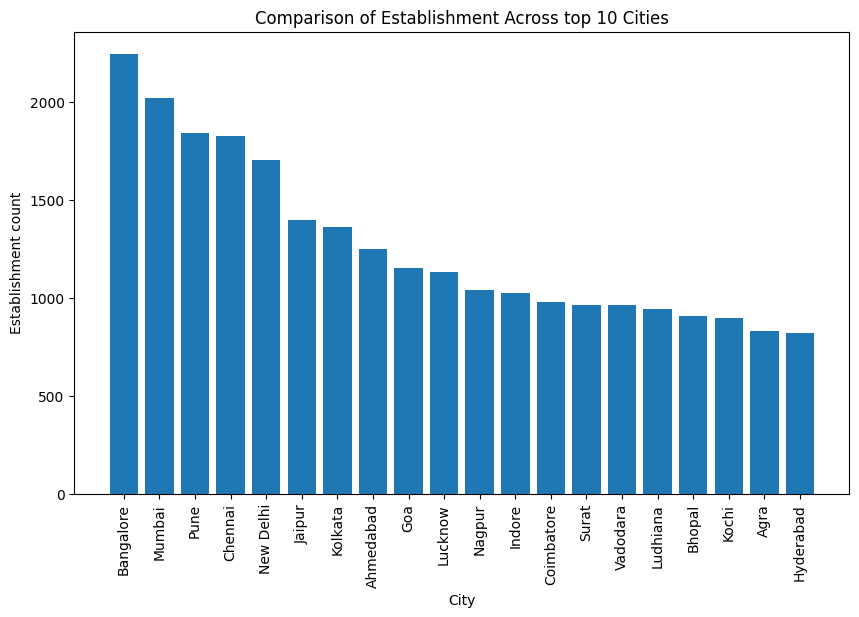

In [92]:
# finding overall total establishments to see with respect to cities
estb = dfnew1.groupby('city')['establishment'].size().reset_index()
estb1 = estb.sort_values(by='establishment', ascending=False)

# Select the top 20 rows
top10estb = estb1.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top10estb['city'], top10estb['establishment'])
# Add labels and title
plt.xlabel('City')
plt.ylabel('Establishment count')
plt.title('Comparison of Establishment Across top 10 Cities')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Bangalore has overall most number of establishments or restaurants. It is followed by Mumbai and others as depicted in above visual

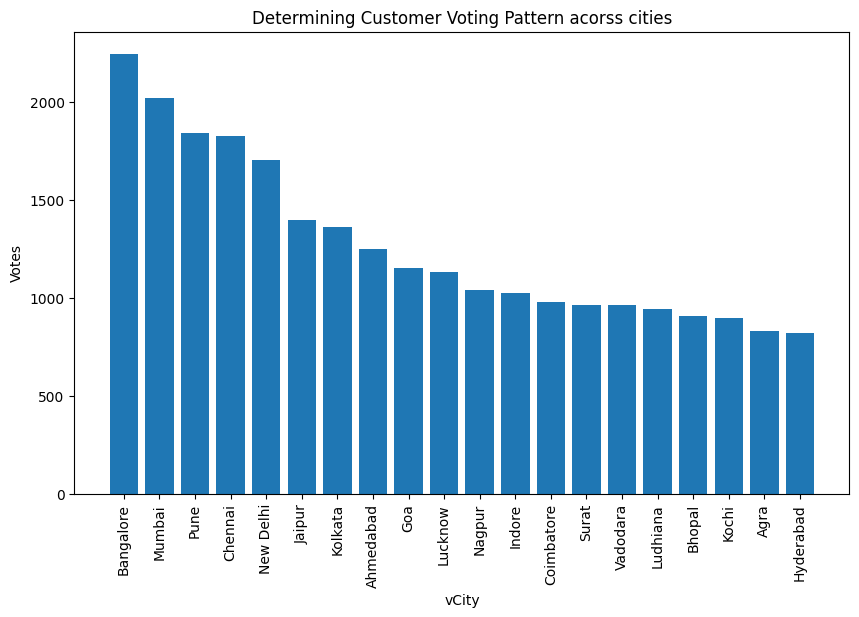

In [93]:
# finding overall total votes to see with respect to cities
estb = dfnew1.groupby('city')['votes'].size().reset_index()
estb1 = estb.sort_values(by='votes', ascending=False)

# Select the top 20 rows
top10estb = estb1.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top10estb['city'], top10estb['votes'])
# Add labels and title
plt.xlabel('vCity')
plt.ylabel('Votes')
plt.title('Determining Customer Voting Pattern acorss cities')
plt.xticks(rotation=90)

# Show the plot
plt.show()

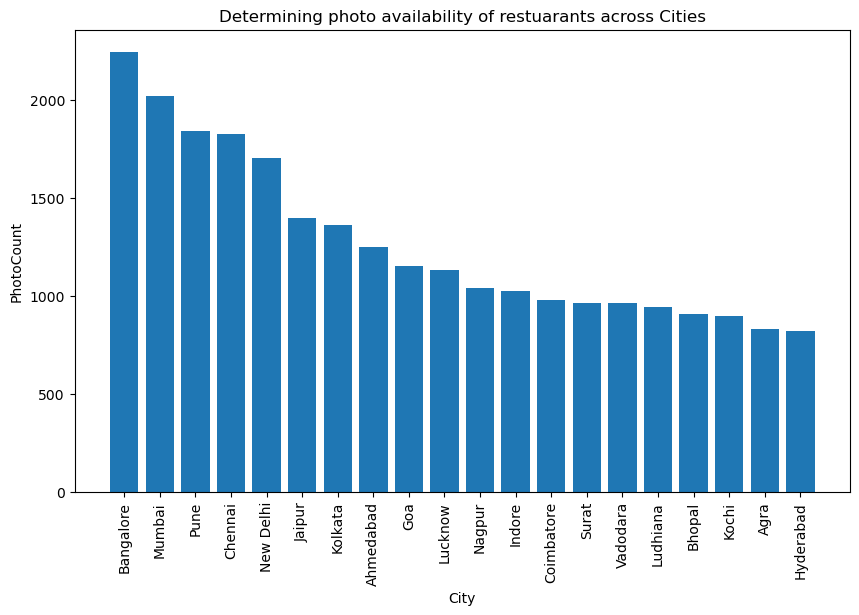

In [ ]:
# finding overall total establishments to see with respect to cities
estb = dfnew1.groupby('city')['photo_count'].size().reset_index()
estb1 = estb.sort_values(by='photo_count', ascending=False)

# Select the top 20 rows
top10estb = estb1.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top10estb['city'], top10estb['photo_count'])
# Add labels and title
plt.xlabel('City')
plt.ylabel('PhotoCount')
plt.title('Determining photo availability of restuarants across Cities')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Most number of establishment is also directly counting into popularity of city based on number of votes it has taken.

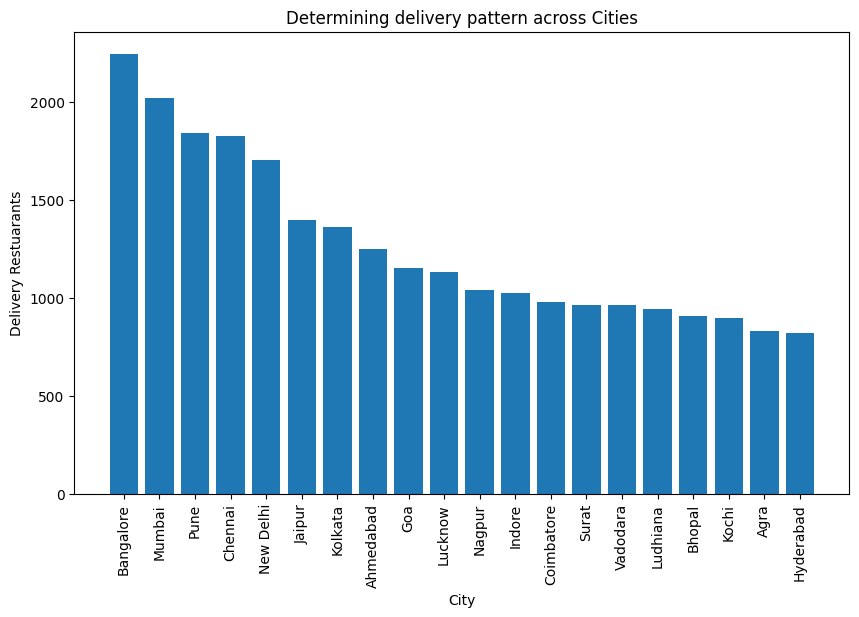

In [94]:
# finding overall total establishments to see with respect to cities
estb = dfnew1.groupby('city')['delivery'].size().reset_index()
estb1 = estb.sort_values(by='delivery', ascending=False)

# Select the top 20 rows
top10estb = estb1.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top10estb['city'], top10estb['delivery'])
# Add labels and title
plt.xlabel('City')
plt.ylabel('Delivery Restuarants')
plt.title('Determining delivery pattern across Cities')
plt.xticks(rotation=90)

# Show the plot
plt.show()

The figure indicates the delivery trend across cities

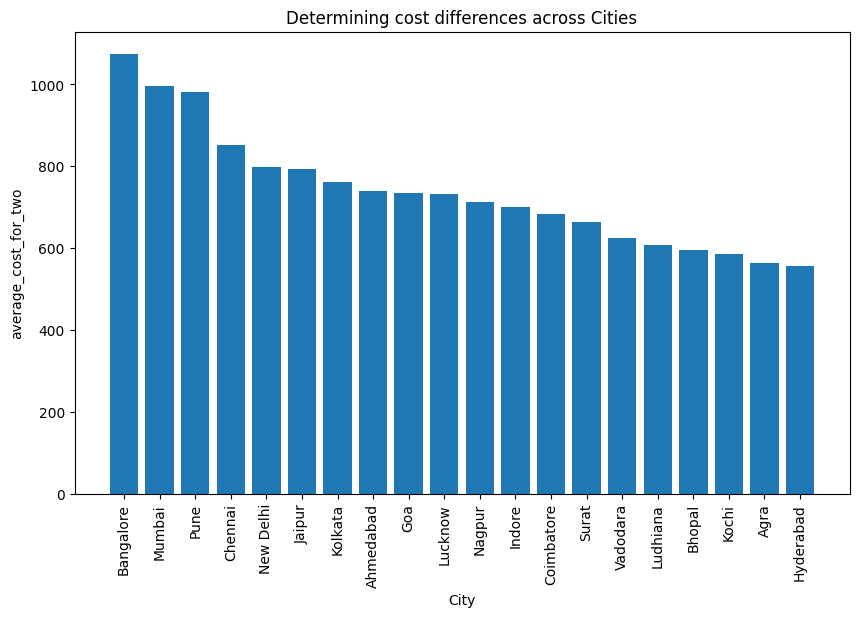

In [95]:
# finding overall total establishments to see with respect to cities
cost = dfnew1.groupby('city')['average_cost_for_two'].mean().reset_index()
cost1 = cost.sort_values(by='average_cost_for_two', ascending=False)

# Select the top 20 rows
top20cost = cost1.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top10estb['city'], top20cost['average_cost_for_two'])
# Add labels and title
plt.xlabel('City')
plt.ylabel('average_cost_for_two')
plt.title('Determining cost differences across Cities')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
city_cuisine_ratings = dfnew1.groupby(['city', 'cuisines'])['aggregate_rating'].mean().reset_index()

# Sort the cuisines within each city based on their mean aggregate rating
city_cuisine_ratings_sorted = city_cuisine_ratings.sort_values(by=['city', 'aggregate_rating'], ascending=[True, False])

# Select the top three cuisines for each city
top_cuisines_by_city = city_cuisine_ratings_sorted.groupby('city').head(2)
top_cuisines_by_city

,city,cuisines,aggregate_rating
168,Agra,"North Indian, Continental, Italian",4.9
45,Agra,"Cafe, North Indian, Chinese",4.8
303,Ahmedabad,"Chinese, Japanese",4.9
319,Ahmedabad,"Continental, Italian, Chinese",4.9
586,Ajmer,"Continental, Beverages, South Indian, Fast Foo...",4.8
...,...,...,...
20705,Vijayawada,BBQ,4.6
21058,Vizag,"European, Mediterranean, North Indian",4.9
20955,Vizag,"Bakery, Cafe",4.7
21193,Zirakpur,"Andhra, Goan, North Indian, Kerala",4.6


# Customer Preference Analysis:

In [96]:
regions = dfnew1.groupby(['city', 'cuisines'])['aggregate_rating'].mean().reset_index()
regionsorted = regions.sort_values(by=['city','aggregate_rating'], ascending=[True, False])
topcuisinesincity = regionsorted.groupby('city').head(1)
topcuisinesincity

,city,cuisines,aggregate_rating
168,Agra,"North Indian, Continental, Italian",4.9
303,Ahmedabad,"Chinese, Japanese",4.9
586,Ajmer,"Continental, Beverages, South Indian, Fast Foo...",4.8
713,Alappuzha,"Arabian, Continental",4.0
919,Allahabad,"North Indian, Mediterranean",4.7
...,...,...,...
20479,Varanasi,"North Indian, Chinese, BBQ",4.9
20647,Vellore,"Juices, Italian, Burger",3.8
20853,Vijayawada,"North Indian, Andhra",4.9
21058,Vizag,"European, Mediterranean, North Indian",4.9


In [97]:
from tabulate import tabulate

# Assuming 'topcuisinesincity' DataFrame contains 'city', 'cuisines', and 'aggregate_rating' columns
# You may need to adjust column names based on your actual DataFrame structure

# Extracting data for table
table_data = []
for index, row in topcuisinesincity.iterrows():
    table_data.append([row['city'], row['cuisines'], row['aggregate_rating']])

# Creating table
table_headers = ["City", "Top Cuisine", "Aggregate Rating"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print(table)

+---------------+---------------------------------------------------------------------------------+--------------------+
| City          | Top Cuisine                                                                     |   Aggregate Rating |
+===============+=================================================================================+====================+
| Agra          | North Indian, Continental, Italian                                              |            4.9     |
+---------------+---------------------------------------------------------------------------------+--------------------+
| Ahmedabad     | Chinese, Japanese                                                               |            4.9     |
+---------------+---------------------------------------------------------------------------------+--------------------+
| Ajmer         | Continental, Beverages, South Indian, Fast Food, Italian, North Indian, Chinese |            4.8     |
+---------------+---------------

In [98]:
def generate_city_cuisine_table(city_name, dfnew1):

    # Filter DataFrame for the specified city
    city_data = dfnew1[dfnew1['city'] == city_name]

    # If city not found or there's no data for the city, return None
    if city_data.empty:
        return "City not found or no data available."

    # Find the top-rated cuisine for the city
    top_cuisine = city_data.loc[city_data['aggregate_rating'].idxmax()]

    # Extract relevant information for the table
    table_data = [[top_cuisine['city'], top_cuisine['cuisines'], top_cuisine['aggregate_rating']]]

    # Create table headers
    table_headers = ["City", "Top Cuisine", "Aggregate Rating"]

    # Generate table using tabulate
    table = tabulate(table_data, headers=table_headers, tablefmt="outline")

    return table

# Example usage:
# Assuming 'dfnew1' DataFrame contains 'city', 'cuisines', and 'aggregate_rating' columns
# You may need to adjust column names based on your actual DataFrame structure
city_name_input = input("Enter city name: ")
table_output = generate_city_cuisine_table(city_name_input, dfnew1)
print(table_output)

Enter city name: Mumbai
+--------+----------------------------------------------+--------------------+
| City   | Top Cuisine                                  |   Aggregate Rating |
+========+==============================================+====================+
| Mumbai | Egyptian, Turkish, Lebanese, Moroccan, Greek |                4.9 |
+--------+----------------------------------------------+--------------------+


In [99]:
establishment_count = dfnew1.groupby(['city', 'establishment']).size().reset_index(name='estblishmentcount')

# Sort the DataFrame by city and count in descending order within each city
establishment_sorted = establishment_count.sort_values(by=['city', 'estblishmentcount'], ascending=[True, False])

# Select the top establishment type for each city
top_establishment = establishment_sorted.groupby('city').first().reset_index()

print(top_establishment)

          city    establishment  estblishmentcount
0         Agra  ['Quick Bites']                190
1    Ahmedabad  ['Quick Bites']                251
2        Ajmer  ['Quick Bites']                184
3    Alappuzha  ['Quick Bites']                 93
4    Allahabad  ['Quick Bites']                172
..         ...              ...                ...
94    Varanasi  ['Quick Bites']                191
95     Vellore  ['Quick Bites']                113
96  Vijayawada  ['Quick Bites']                165
97       Vizag  ['Quick Bites']                203
98    Zirakpur  ['Quick Bites']                 32

[99 rows x 3 columns]


In [100]:
table_data = []
for index, row in top_establishment.iterrows():
    table_data.append([row['city'], row['establishment'], row['estblishmentcount']])

# Creating table
table_headers = ["City", "Establishment", "EstablishmentCount"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print(table)

+---------------+-------------------+----------------------+
| City          | Establishment     |   EstablishmentCount |
+===============+===================+======================+
| Agra          | ['Quick Bites']   |                  190 |
+---------------+-------------------+----------------------+
| Ahmedabad     | ['Quick Bites']   |                  251 |
+---------------+-------------------+----------------------+
| Ajmer         | ['Quick Bites']   |                  184 |
+---------------+-------------------+----------------------+
| Alappuzha     | ['Quick Bites']   |                   93 |
+---------------+-------------------+----------------------+
| Allahabad     | ['Quick Bites']   |                  172 |
+---------------+-------------------+----------------------+
| Amravati      | ['Casual Dining'] |                  155 |
+---------------+-------------------+----------------------+
| Amritsar      | ['Quick Bites']   |                  229 |
+---------------+-------

In [101]:
cuisinepopular = dfnew1.groupby(['city', 'cuisines'])['votes'].size().reset_index()
cuisinepopular1 = cuisinepopular.sort_values(by=['city','votes'], ascending=[True, False])
cuisinepopular2 = cuisinepopular1.groupby('city').head(1)
cuisinepopular2

,city,cuisines,votes
139,Agra,North Indian,114
532,Ahmedabad,Street Food,80
652,Ajmer,North Indian,73
718,Alappuzha,Bakery,53
896,Allahabad,North Indian,101
...,...,...,...
20475,Varanasi,North Indian,52
20672,Vellore,South Indian,41
20896,Vijayawada,South Indian,38
21160,Vizag,South Indian,57


In [102]:
table_data = []
for index, row in cuisinepopular2.iterrows():
    table_data.append([row['city'], row['cuisines'], row['votes']])

# Creating table
table_headers = ["City", "Cuisine", "Popular Vote Count"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print(table)

+---------------+------------------------------+----------------------+
| City          | Cuisine                      |   Popular Vote Count |
+===============+==============================+======================+
| Agra          | North Indian                 |                  114 |
+---------------+------------------------------+----------------------+
| Ahmedabad     | Street Food                  |                   80 |
+---------------+------------------------------+----------------------+
| Ajmer         | North Indian                 |                   73 |
+---------------+------------------------------+----------------------+
| Alappuzha     | Bakery                       |                   53 |
+---------------+------------------------------+----------------------+
| Allahabad     | North Indian                 |                  101 |
+---------------+------------------------------+----------------------+
| Amravati      | North Indian                 |                

In [103]:
cuisinepopular2.sort_values(by=['votes'], ascending=[False])

,city,cuisines,votes
8136,Jaipur,North Indian,194
8415,Jalandhar,North Indian,156
11814,Madurai,South Indian,131
15137,New Delhi,North Indian,128
10958,Kota,North Indian,125
...,...,...,...
14546,Navi Mumbai,Chinese,6
14672,Neemrana,North Indian,4
14656,Nayagaon,North Indian,3
6981,Howrah,Fast Food,3


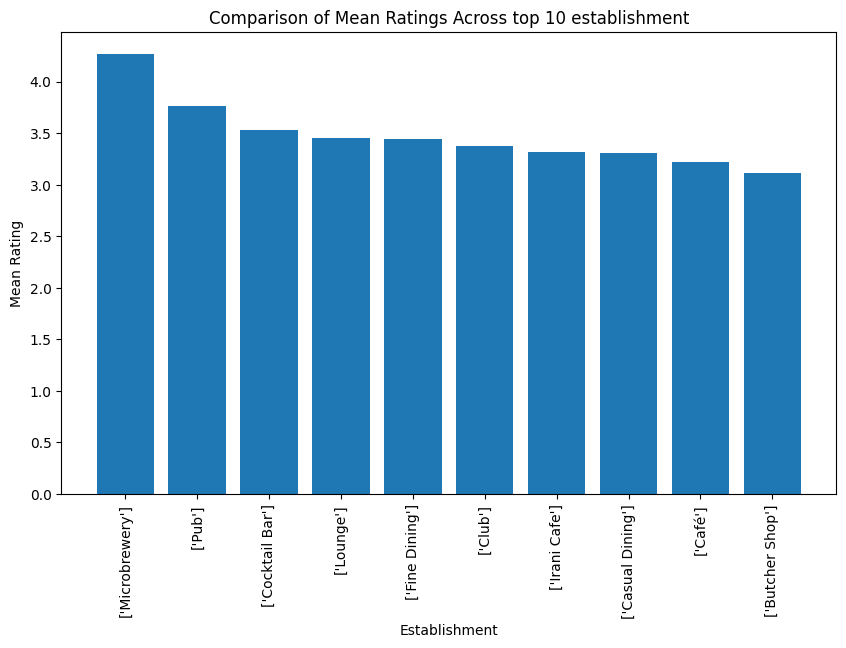

In [104]:
# Group the data by city and calculate mean rating
est_num = dfnew1.groupby('establishment')['aggregate_rating'].mean().reset_index()
est_num1 = est_num.sort_values(by='aggregate_rating', ascending=False)

# Select the top 20 rows
top20est = est_num1.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top20est['establishment'], top20est['aggregate_rating'])
# Add labels and title
plt.xlabel('Establishment')
plt.ylabel('Mean Rating')
plt.title('Comparison of Mean Ratings Across top 10 establishment')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In establishments, taking aggregate rating into account top choice for customers are Microbrewery, pubs, cocktails and other as shown in visual above.

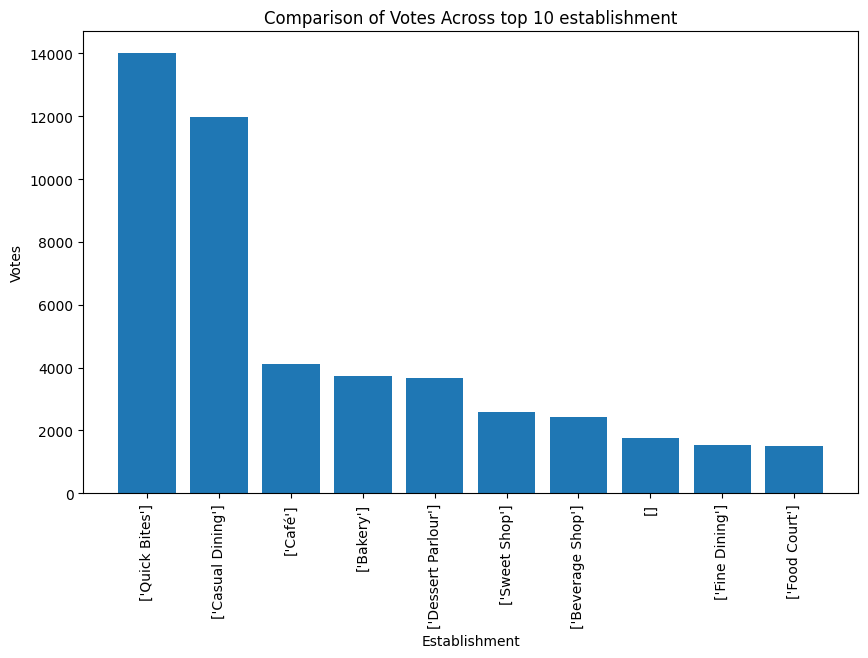

In [106]:
# Group the data by city and calculate mean rating
est_num = dfnew1.groupby('establishment')['votes'].size().reset_index()
est_num1 = est_num.sort_values(by='votes', ascending=False)

# Select the top 20 rows
top20est = est_num1.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top20est['establishment'], top20est['votes'])
# Add labels and title
plt.xlabel('Establishment')
plt.ylabel('Votes')
plt.title('Comparison of Votes Across top 10 establishment')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Quick bytes is highest accross the country and it is followed by casual dining. All others are significantly less than these two based on available data.

In [107]:
pricerange = dfnew1.groupby(['city', 'price_range'])['votes'].size().reset_index()
pricerange1 = pricerange.sort_values(by=['city','votes'], ascending=[True, False])
pricerange2 = pricerange1.groupby('city').head(1)
pricerange2

,city,price_range,votes
0,Agra,1,459
5,Ahmedabad,2,521
8,Ajmer,1,272
12,Alappuzha,1,173
16,Allahabad,1,205
...,...,...,...
361,Varanasi,2,204
364,Vellore,1,222
368,Vijayawada,1,239
372,Vizag,1,323


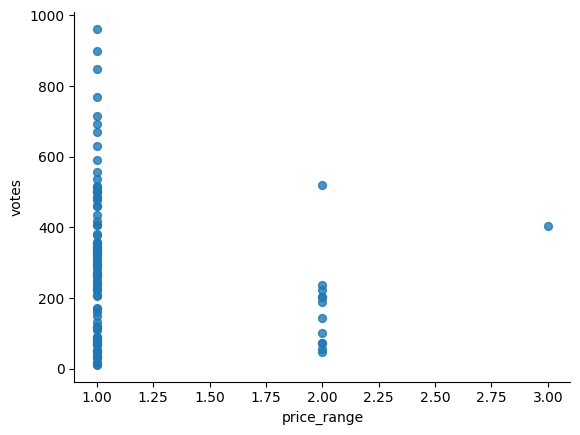

In [109]:
# @title price_range vs votes

from matplotlib import pyplot as plt
pricerange2.plot(kind='scatter', x='price_range', y='votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

More votes have come acorss price range 1. There are very less for price range 3 and 4 which undermines their popularity

In [110]:
table_data = []
for index, row in pricerange2.iterrows():
    table_data.append([row['city'], row['price_range'], row['votes']])

# Creating table
table_headers = ["City", "Price_range", "Popular Vote Count"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print(table)

+---------------+---------------+----------------------+
| City          |   Price_range |   Popular Vote Count |
+===============+===============+======================+
| Agra          |             1 |                  459 |
+---------------+---------------+----------------------+
| Ahmedabad     |             2 |                  521 |
+---------------+---------------+----------------------+
| Ajmer         |             1 |                  272 |
+---------------+---------------+----------------------+
| Alappuzha     |             1 |                  173 |
+---------------+---------------+----------------------+
| Allahabad     |             1 |                  205 |
+---------------+---------------+----------------------+
| Amravati      |             1 |                  332 |
+---------------+---------------+----------------------+
| Amritsar      |             1 |                  281 |
+---------------+---------------+----------------------+
| Aurangabad    |             1

In [111]:
pricerange = dfnew1.groupby(['city', 'price_range'])['aggregate_rating'].mean().reset_index()
pricerange1 = pricerange.sort_values(by=['city','aggregate_rating'], ascending=[True, False])
pricerange2 = pricerange1.groupby('city').head(1)
pricerange2

,city,price_range,aggregate_rating
1,Agra,2,3.300000
6,Ahmedabad,3,4.040120
11,Ajmer,4,3.500000
13,Alappuzha,2,0.753731
19,Allahabad,4,3.735000
...,...,...,...
362,Varanasi,3,3.342077
367,Vellore,4,3.450000
369,Vijayawada,2,3.316256
374,Vizag,3,3.459211


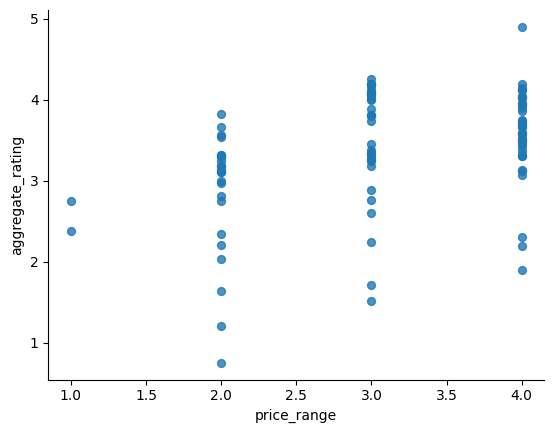

In [112]:
# @title price_range vs aggregate_rating

from matplotlib import pyplot as plt
pricerange2.plot(kind='scatter', x='price_range', y='aggregate_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Although we have witnessed that more votes have come for price range 1 but it is evident that more rating is for price range 3 and 4. This is a preferenace analysis which identifies a potential gap in market to be addressed

In [113]:
table_data = []
for index, row in pricerange2.iterrows():
    table_data.append([row['city'], row['price_range'], row['aggregate_rating']])

# Creating table
table_headers = ["City", "Price_range", "Aggregate Rating Mean"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print(table)

+---------------+---------------+-------------------------+
| City          |   Price_range |   Aggregate Rating Mean |
+===============+===============+=========================+
| Agra          |             2 |                3.3      |
+---------------+---------------+-------------------------+
| Ahmedabad     |             3 |                4.04012  |
+---------------+---------------+-------------------------+
| Ajmer         |             4 |                3.5      |
+---------------+---------------+-------------------------+
| Alappuzha     |             2 |                0.753731 |
+---------------+---------------+-------------------------+
| Allahabad     |             4 |                3.735    |
+---------------+---------------+-------------------------+
| Amravati      |             2 |                2.20312  |
+---------------+---------------+-------------------------+
| Amritsar      |             2 |                3.18174  |
+---------------+---------------+-------

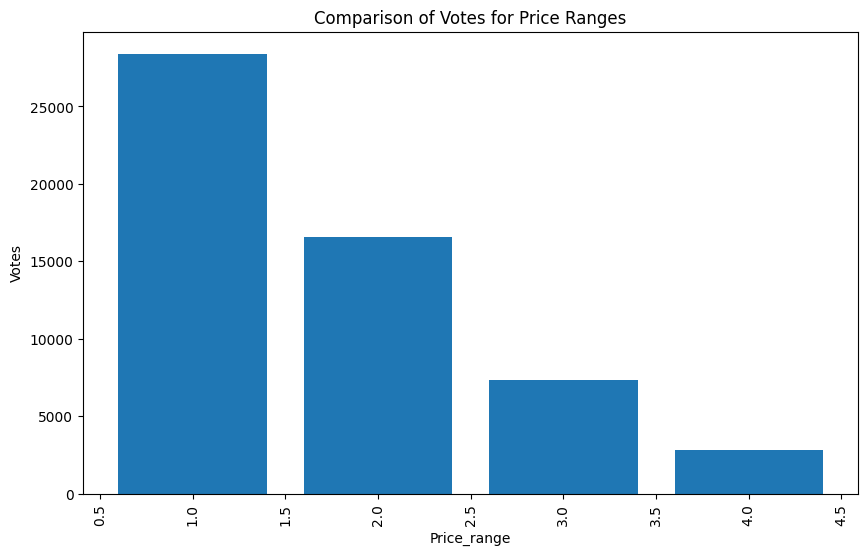

In [114]:
# Group the data by city and votes
price = dfnew1.groupby('price_range')['votes'].size().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(price['price_range'], price['votes'])
# Add labels and title
plt.xlabel('Price_range')
plt.ylabel('Votes')
plt.title('Comparison of Votes for Price Ranges')
plt.xticks(rotation=90)

# Show the plot
plt.show()

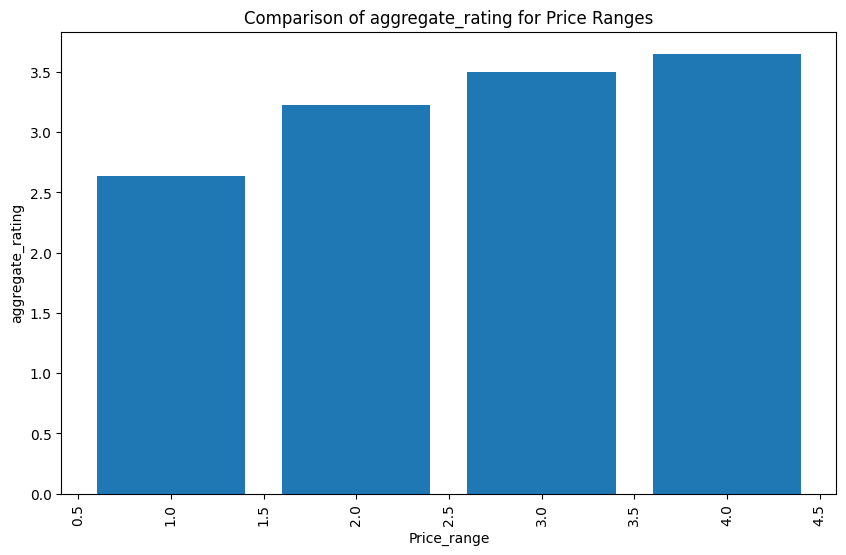

In [115]:
# Group the data by city and votes
price = dfnew1.groupby('price_range')['aggregate_rating'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(price['price_range'], price['aggregate_rating'])
# Add labels and title
plt.xlabel('Price_range')
plt.ylabel('aggregate_rating')
plt.title('Comparison of aggregate_rating for Price Ranges')
plt.xticks(rotation=90)

# Show the plot
plt.show()

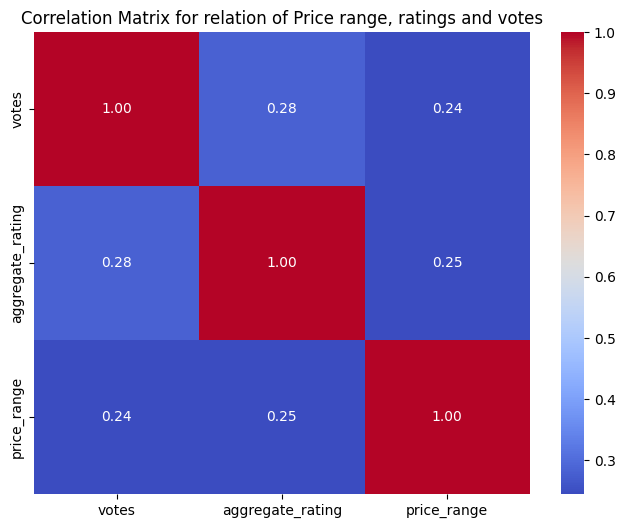

In [116]:
correlation = dfnew1[['votes','aggregate_rating','price_range']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix for relation of Price range, ratings and votes')
plt.show()

In [117]:
dfnew1.columns

Index(['res_id', 'name', 'establishment', 'city', 'city_id', 'locality',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'delivery'],
      dtype='object')

# Competitive Analysis

In [118]:
city_profile = dfnew1.groupby('city').agg(
    highest_occuring_name=('name', lambda x: x.mode().iloc[0]),  # Get the mode (most frequent) name in the city
    most_number_of_establishments=('establishment', lambda x: x.mode().iloc[0]),  # Get the mode establishment type in the city
    aggregate_rating=('aggregate_rating', 'mean'),  # Get the mean aggregate rating in the city
    top_cuisine=('cuisines', lambda x: x.mode().iloc[0]), # Get the mode cuisine in the city
    mostoccuringpricerange=('price_range', lambda x: x.mode().iloc[0]) #Get the mode for cuisine
).reset_index()

# Display the city profiles
print(city_profile)

          city       highest_occuring_name most_number_of_establishments  \
0         Agra  Sri Dauji Mishthan Bhandar               ['Quick Bites']   
1    Ahmedabad              Domino's Pizza               ['Quick Bites']   
2        Ajmer       Manoj's Kake Di Hatti               ['Quick Bites']   
3    Alappuzha                 Best Bakery               ['Quick Bites']   
4    Allahabad              Baskin Robbins               ['Quick Bites']   
..         ...                         ...                           ...   
94    Varanasi                   Chestnuts               ['Quick Bites']   
95     Vellore              Domino's Pizza               ['Quick Bites']   
96  Vijayawada     Alankar Sweets & Bakers               ['Quick Bites']   
97       Vizag         Fresh Choice Bakery               ['Quick Bites']   
98    Zirakpur              Baskin Robbins               ['Quick Bites']   

    aggregate_rating   top_cuisine  mostoccuringpricerange  
0           2.660096  Nort

In [119]:
from tabulate import tabulate

# Initialize an empty list to store city profiles
city_profiles = []

# Iterate over each city
for city in dfnew1['city'].unique():
    # Filter data for the current city
    city_data = dfnew1[dfnew1['city'] == city]

    frequentname = city_data['name'].mode().iloc[0]
    mostestablishments = city_data['establishment'].mode().iloc[0]
    aggregate_rating = city_data['aggregate_rating'].mean()
    top_cuisine = city_data['cuisines'].mode().iloc[0]
    highpricerange =city_data['price_range'].mode().iloc[0]

    # Create a dictionary representing the profile information for the current city
    city_profile = {
        'City': city,
        'FrequentName': frequentname,
        'MostEstablishments': mostestablishments,
        'AggregateRating': aggregate_rating,
        'TopCuisine': top_cuisine,
        'HighPriceRange' : highpricerange
    }

    # Append the city profile to the list of city profiles
    city_profiles.append(city_profile)

city_profiles_df = pd.DataFrame(city_profiles)
city_profiles_df

,City,FrequentName,MostEstablishments,AggregateRating,TopCuisine,HighPriceRange
0,Agra,Sri Dauji Mishthan Bhandar,['Quick Bites'],2.660096,North Indian,1
1,Ahmedabad,Domino's Pizza,['Quick Bites'],3.209623,Street Food,2
2,Gandhinagar,Domino's Pizza,['Quick Bites'],2.853125,"Pizza, Fast Food",2
3,Ajmer,Manoj's Kake Di Hatti,['Quick Bites'],2.592982,North Indian,1
4,Alappuzha,Best Bakery,['Quick Bites'],0.379608,Bakery,1
...,...,...,...,...,...,...
94,Varanasi,Chestnuts,['Quick Bites'],3.018182,North Indian,2
95,Vellore,Domino's Pizza,['Quick Bites'],2.172881,South Indian,1
96,Vijayawada,Alankar Sweets & Bakers,['Quick Bites'],3.001245,South Indian,1
97,Vizag,Fresh Choice Bakery,['Quick Bites'],3.160519,South Indian,1


In [121]:
city_profiles_df.set_index('City', inplace=True)

In [122]:
city_profiles_df

,FrequentName,MostEstablishments,AggregateRating,TopCuisine,HighPriceRange
City,,,,,
Agra,Sri Dauji Mishthan Bhandar,['Quick Bites'],2.660096,North Indian,1
Ahmedabad,Domino's Pizza,['Quick Bites'],3.209623,Street Food,2
Gandhinagar,Domino's Pizza,['Quick Bites'],2.853125,"Pizza, Fast Food",2
Ajmer,Manoj's Kake Di Hatti,['Quick Bites'],2.592982,North Indian,1
Alappuzha,Best Bakery,['Quick Bites'],0.379608,Bakery,1
...,...,...,...,...,...
Varanasi,Chestnuts,['Quick Bites'],3.018182,North Indian,2
Vellore,Domino's Pizza,['Quick Bites'],2.172881,South Indian,1
Vijayawada,Alankar Sweets & Bakers,['Quick Bites'],3.001245,South Indian,1


In [123]:
for index, row in city_profiles_df.iterrows():
    print([row])
    print('----------------------')

[FrequentName          Sri Dauji Mishthan Bhandar
MostEstablishments               ['Quick Bites']
AggregateRating                         2.660096
TopCuisine                          North Indian
HighPriceRange                                 1
Name: Agra, dtype: object]
----------------------
[FrequentName           Domino's Pizza
MostEstablishments    ['Quick Bites']
AggregateRating              3.209623
TopCuisine                Street Food
HighPriceRange                      2
Name: Ahmedabad, dtype: object]
----------------------
[FrequentName            Domino's Pizza
MostEstablishments     ['Quick Bites']
AggregateRating               2.853125
TopCuisine            Pizza, Fast Food
HighPriceRange                       2
Name: Gandhinagar, dtype: object]
----------------------
[FrequentName          Manoj's Kake Di Hatti
MostEstablishments          ['Quick Bites']
AggregateRating                    2.592982
TopCuisine                     North Indian
HighPriceRange              

In [124]:
def get_city_details(city_name):
    # Check if the city name exists in the index
    if city_name in city_profiles_df.index:
        # Retrieve the details of the city
        city_details = city_profiles_df.loc[city_name]
        return city_details
    else:
        print(f"City '{city_name}' not found in the DataFrame.")
        return None

In [125]:
get_city_details('Chennai')

FrequentName                      ibaco
MostEstablishments    ['Casual Dining']
AggregateRating                3.597701
TopCuisine                 South Indian
HighPriceRange                        1
Name: Chennai, dtype: object

Marketing Campaigns
1. The function above provides us with city details. The mean rating is important as it defines how much on average all restaurants are rated. Therefore, all places which are rated below should be analyzed for improvement.
2. The features for all places above the mean rating must be considered to suggest any recommendations for improvements.
3. India is diverse it is also depicted from the analysis of data. Each state or city has their distinct customer base or choice. For example, North Indian cuisine might not be a for Chennai. Therefore, it is also important to determine the cuisine style for the place to be able to suggest cuisine or name of the best place to the customers.
4. For Zomato, the most dominant name in the city is important as it can help them in getting fimilarized and popular medium. Therefore, there should be targeted compaign covering the most popular place of city on platform. It can also be used for getting them on their food delivery platform to deal with customers on that front.
5. Overall for India as well, the most common brands should be picked for inital attention of the customers visiting Zomato platform for information so that it can help customers to recognize Zomato as platform or delivery service. Moreover considering delivery service this appraoch is also beneficial for constant stream of revenue as more orders are taken. Having more popular one on platform will also increase the chances of getting more visits.
6. Considering Zomato as a also delivery providing company, places which do not have delivery in place can also be targeted based on a revenue model that either provide some percentage from their order or monthly sum. This can also help companies which do not have presence to estblish their core presence. Moreover, along with delivery providing partnerships, customers reviews can be used to generate information and a campaign for place on platform. People not fimiliar can reach out and hence can benefit both choices.
7. Since there is a lot of insights from data, there can be criteria established for targeting places to get them on board for delivery service for Zomato. The criteria of rating, price, customer preferences, popularity can help them in providing the quality which is expected and catering to demand. This can reduce the costs that could be incurred to set up resource for delivery for the places which do no get attention from customers.
8. Hence a regional marketing campaign, dealing every region on its distinct qualities is important for Zomato to cater to the preferences of the customers. It is also evident that places which deliver has more rating than the places which do not. Therefore based on delivery, providing ease to customers who are either at offices or even at work with best quality and timely service is a good campaign to launch. Understanding customers demand everywhere can help in distinguishing from competitors.
9. For each region there can be a dashboard indicating the best cuisine and also indicating most visited based on numbers and data. Pictres can also be published on runtime which will allow visitors at the places which are not regular customers to make more informed decisions. 



# Market Gap

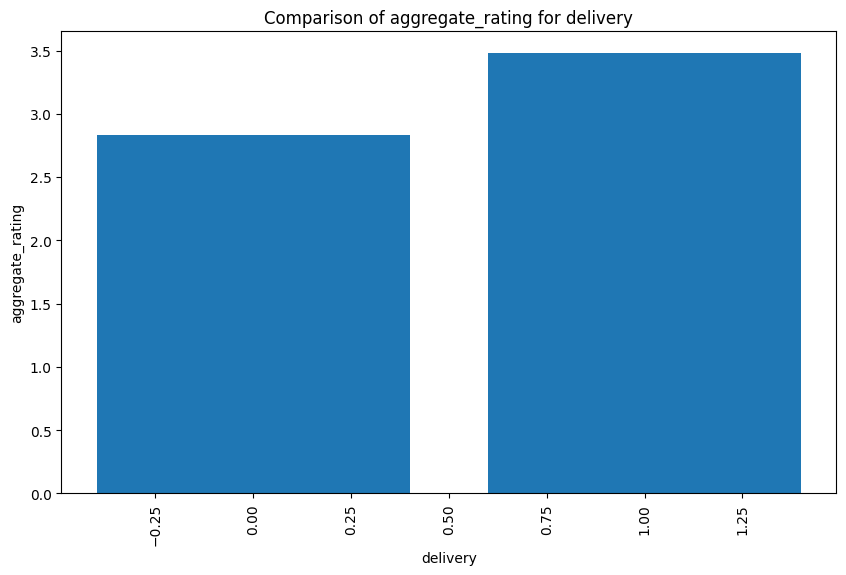

In [127]:
delivery = dfnew1.groupby('delivery')['aggregate_rating'].mean().reset_index()

mindev = 0
delivery = delivery[delivery['delivery'] >= mindev]

plt.figure(figsize=(10, 6))
plt.bar(delivery['delivery'], delivery['aggregate_rating'])
# Add labels and title
plt.xlabel('delivery')
plt.ylabel('aggregate_rating')
plt.title('Comparison of aggregate_rating for delivery')
plt.xticks(rotation=90)

# Show the plot
plt.show()

The gap in the market is for restaurant to determine that having delivery option raises the rating. Moreover, all places having rating more than 3 should be targeted by Zomato. For them even Zomato for delivery should be an option to cater to the requirements for the customers.

In [126]:
dfnew1['price_range'].value_counts()

price_range
1    28401
2    16541
3     7361
4     2795
Name: count, dtype: int64

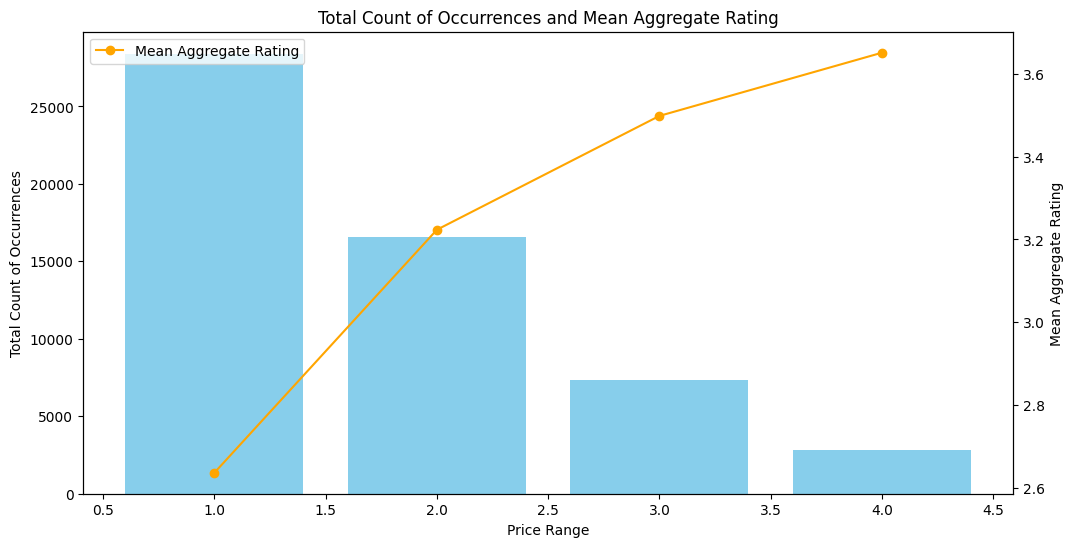

In [128]:
# Group the data by 'price_range' and calculate total count of occurrences and mean aggregate rating
grouped_data = dfnew1.groupby('price_range').agg(count_occurrences=('price_range', 'size'), mean_rating=('aggregate_rating', 'mean')).reset_index()

# Plotting the total count of occurrences and mean aggregate rating
plt.figure(figsize=(12, 6))

# Bar plot for total count of occurrences
plt.bar(grouped_data['price_range'], grouped_data['count_occurrences'], color='skyblue', label='Total Count of Occurrences')

# Adding labels and title for the first plot
plt.xlabel('Price Range')
plt.ylabel('Total Count of Occurrences')
plt.title('Total Count of Occurrences and Mean Aggregate Rating')

# Creating a twin axes object for the second plot
plt.twinx()

# Line plot for the mean aggregate rating
plt.plot(grouped_data['price_range'], grouped_data['mean_rating'], color='orange', marker='o', label='Mean Aggregate Rating')

# Adding labels and title for the second plot
plt.ylabel('Mean Aggregate Rating')

# Adding legend for both plots
plt.legend(loc='upper left')

# Show the plot
plt.show()

We are witnessing that as price range goes up, rating also go up. However, there are more restuarants at 1 price range. Therefore, this is also one area which can be explored for further targeting customers to reach their satisfaction level.

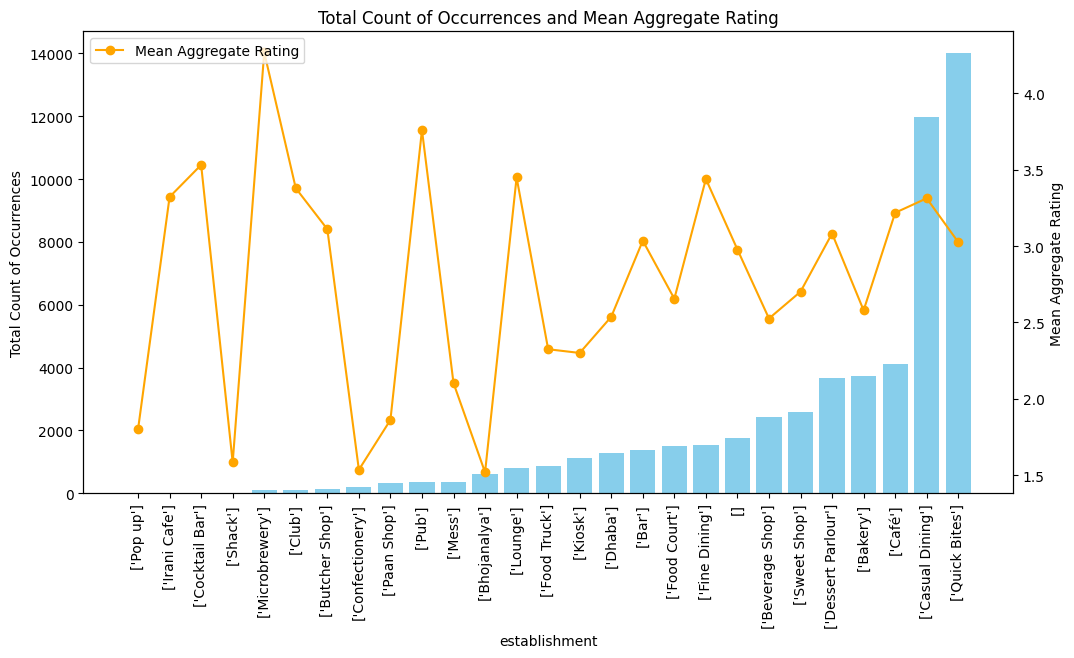

In [129]:
# Group the data by 'establishment' and calculate total count of occurrences and mean aggregate rating
grouped_data = dfnew1.groupby('establishment').agg(count_occurrences=('establishment', 'size'), mean_rating=('aggregate_rating', 'mean')).reset_index()
grouped_data = grouped_data.sort_values(by=['count_occurrences'], ascending=[True])

# Plotting the total count of occurrences and mean aggregate rating
plt.figure(figsize=(12, 6))

# Bar plot for total count of occurrences
plt.bar(grouped_data['establishment'], grouped_data['count_occurrences'], color='skyblue', label='Total Count of Occurrences')

# Adding labels and title for the first plot
plt.xlabel('establishment')
plt.ylabel('Total Count of Occurrences')
plt.xticks(rotation=90)
plt.title('Total Count of Occurrences and Mean Aggregate Rating')

# Creating a twin axes object for the second plot
plt.twinx()

# Line plot for the mean aggregate rating
plt.plot(grouped_data['establishment'], grouped_data['mean_rating'], color='orange', marker='o', label='Mean Aggregate Rating')

# Adding labels and title for the second plot
plt.ylabel('Mean Aggregate Rating')

# Adding legend for both plots
plt.legend(loc='upper left')

# Show the plot
plt.show()

There are some establishments which have higher ratings but are not much in number. These establishments are good for targeting and informing customers based on where there preferences are. Following is a list from picture:
1. Microbrewery
2. Club
3. Butcher Shop
4. Pub
5. Lounge
6. Fine Dining

There are others as well and these can be targeted to provide to ease to customer to further enhance their ratings and increase their popularity

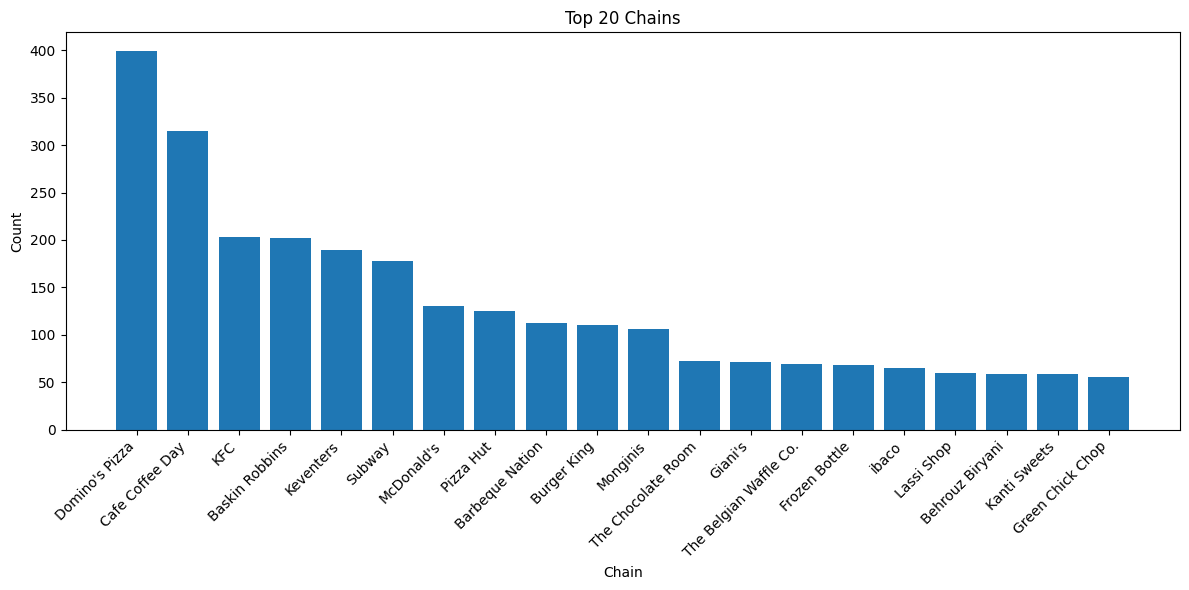

In [130]:
chain_counts1 = dfnew1['name'].value_counts()
chain_counts1 = chain_counts1.head(20)

plt.figure(figsize=(12, 6))
plt.bar(chain_counts1.index, chain_counts1.values)

plt.xlabel('Chain')
plt.ylabel('Count')
plt.title('Top 20 Chains')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

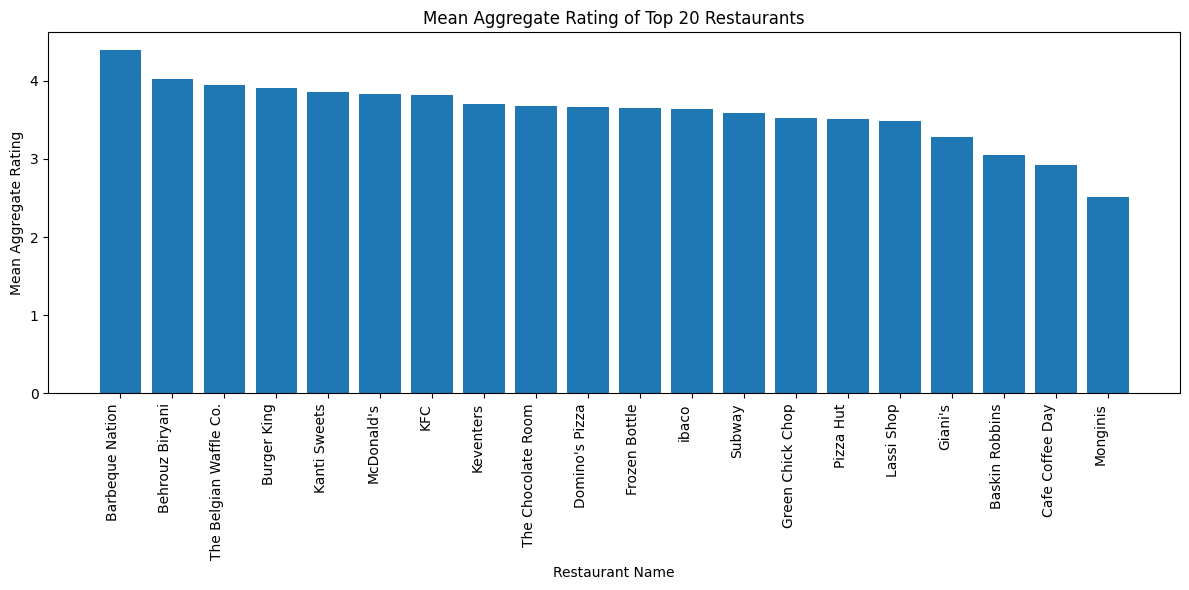

In [132]:
chain_counts1 = dfnew1['name'].value_counts().head(20)

# Group by restaurant name and calculate the mean aggregate rating
chain_counts = dfnew1.groupby('name')['aggregate_rating'].mean().reset_index()

# Filter chain_counts to include only the top 20 restaurant names
chain_counts = chain_counts[chain_counts['name'].isin(chain_counts1.index)]
chain_counts = chain_counts.sort_values(by= ['aggregate_rating'], ascending=[False])

# Plot the filtered DataFrame
plt.figure(figsize=(12, 6))
plt.bar(chain_counts['name'], chain_counts['aggregate_rating'])

plt.xlabel('Restaurant Name')
plt.ylabel('Mean Aggregate Rating')
plt.title('Mean Aggregate Rating of Top 20 Restaurants')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

Another potential gap could be the restaurant chains. From the above two figures it is depicted that Dominos chain is prevelant across India. However, when it comes to most rated one. the situation is different.Therefore, it is important to targat both lists equally. Most occuring chains are essential in getting more popularity and access for Zomato acorss all regions and in overall country. Moreover, having publications about highest rated ones will help in becoming the ultimate choice of the customers for searching places as it is directly dealing with the customers choices.